# Find contours with Clojure, JavaCV

In [2]:
(ns contours
  (:import [org.bytedeco.javacv CanvasFrame OpenCVFrameConverter$ToMat])
  (:import [javax.swing WindowConstants])
  (:import [org.bytedeco.opencv.opencv_core IplImage Mat MatVector Scalar])
  (:import [org.bytedeco.opencv.global opencv_imgcodecs opencv_core opencv_imgproc]))

In [3]:
(defn detect-objects [image]
  (let [result (.clone image) contours (MatVector.)]
    (opencv_imgproc/cvtColor image image opencv_imgproc/CV_BGR2GRAY)
    (opencv_imgproc/threshold image image 40.0 200.0 opencv_imgproc/CV_THRESH_BINARY_INV)
    (opencv_imgcodecs/imwrite "thresh_clj.jpg" image)
    (opencv_imgproc/findContours image contours opencv_imgproc/CV_RETR_LIST opencv_imgproc/CV_CHAIN_APPROX_SIMPLE)
    (dotimes [i (.size contours)]
      (let [contour (.get contours i) points (Mat.)]
        (opencv_imgproc/approxPolyDP contour points (* 0.02 (opencv_imgproc/arcLength contour true)) true)
        (opencv_imgproc/drawContours result (MatVector. points) -1 (Scalar/BLUE))))
    result))

#'contours/detect-objects

In [4]:
 (let [marcel (Mat. (org.bytedeco.opencv.helper.opencv_imgcodecs/cvLoadImage "marcel.jpg"))
        result (detect-objects marcel)]
    (opencv_imgcodecs/imwrite "detected_clj.jpg" result))

true

In [5]:
(import '[org.bytedeco.javacv Java2DFrameConverter OpenCVFrameConverter$ToMat]
        '[org.bytedeco.opencv.opencv_core IplImage])
(defn matToBufferedImage [src] 
    (let[ grabberConverter (OpenCVFrameConverter$ToMat.)
          paintConverter (org.bytedeco.javacv.Java2DFrameConverter.)
          frame (.convert grabberConverter (IplImage. src))]
    (.getBufferedImage paintConverter frame)))

#'contours/matToBufferedImage

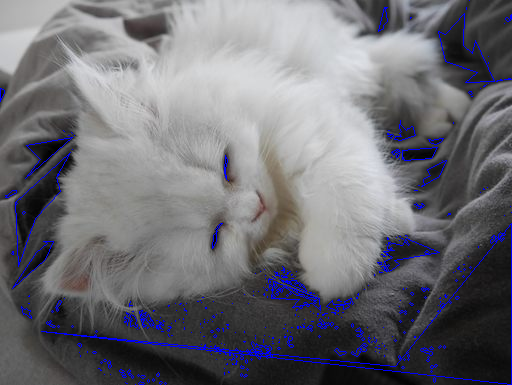

In [6]:
 (let [marcel (Mat. (org.bytedeco.opencv.helper.opencv_imgcodecs/cvLoadImage "marcel.jpg"))
        result (detect-objects marcel)]
    (matToBufferedImage result))